In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/Ayushi0214/Customer-Churn-analysis/refs/heads/main/Customer%20Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df['customerID'].duplicated().sum()
# always check dupes using primary key

np.int64(0)

In [16]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x:"yes" if x == 1 else "no")

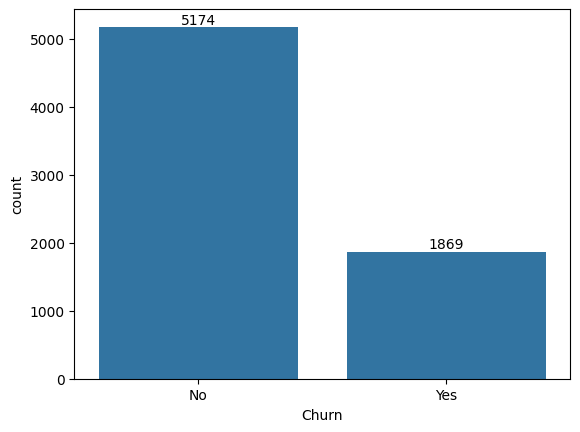

In [21]:
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])

plt.show()

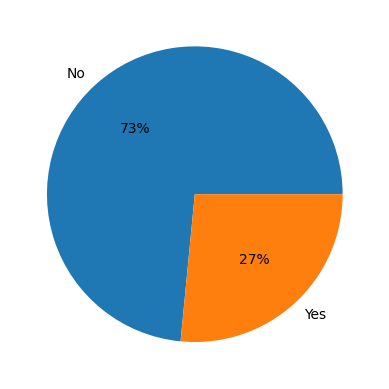

In [29]:
gb = df.groupby('Churn').agg({'Churn':'count'})

ax = plt.pie(gb['Churn'], labels=gb.index, autopct='%1.0f%%')
plt.show()

reason behind churning

<Axes: xlabel='gender', ylabel='count'>

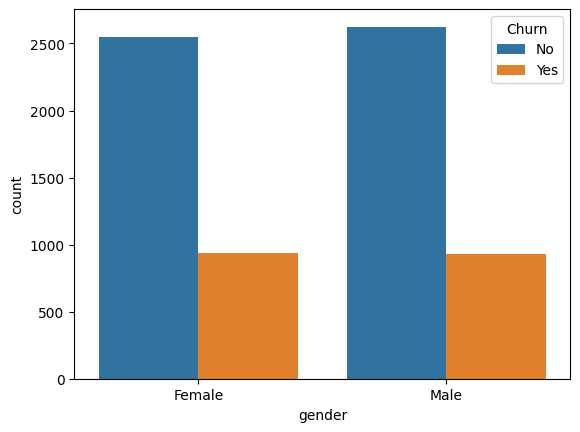

In [ ]:
sns.countplot(x = 'gender', hue='Churn', data=df)


<Axes: xlabel='SeniorCitizen', ylabel='count'>

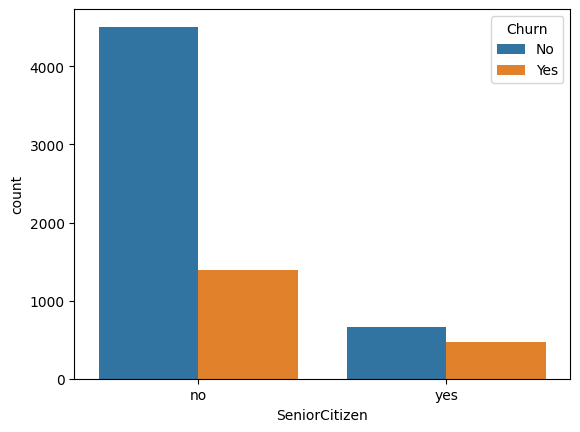

In [41]:
sns.countplot(x = 'SeniorCitizen', hue='Churn', data=df)

<Axes: xlabel='tenure', ylabel='Count'>

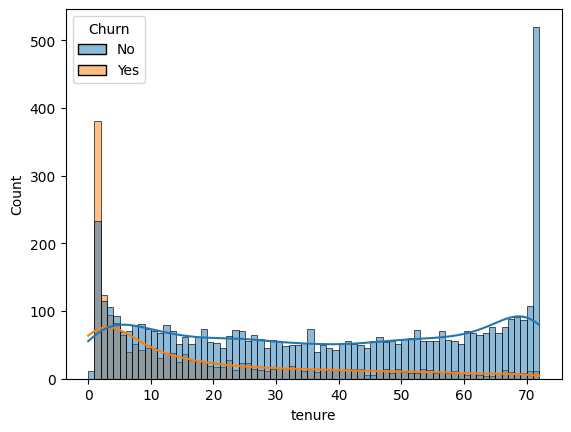

In [48]:
sns.histplot(x= 'tenure', data=df, kde=True, bins=72, hue='Churn')

[Text(0, 0, '2220'), Text(0, 0, '1307'), Text(0, 0, '1647')]

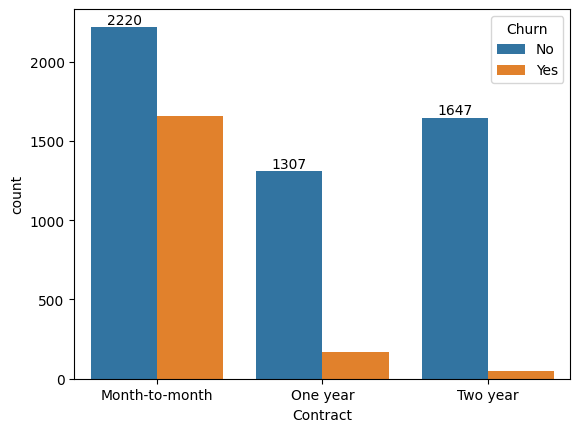

In [51]:
ax = sns.countplot(x = 'Contract', data=df, hue='Churn')
ax.bar_label(ax.containers[0])

[Text(0, 0, '1294'),
 Text(0, 0, '1304'),
 Text(0, 0, '1286'),
 Text(0, 0, '1290')]

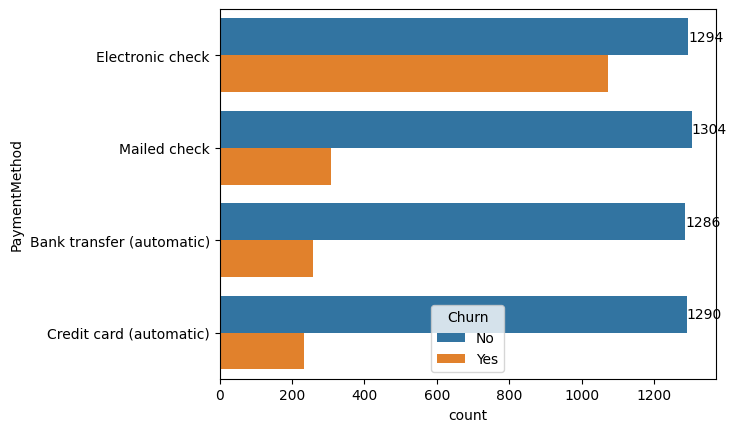

In [61]:
ax = sns.countplot(y = 'PaymentMethod', data=df, hue='Churn')
ax.bar_label(ax.containers[0])

<Axes: xlabel='count'>

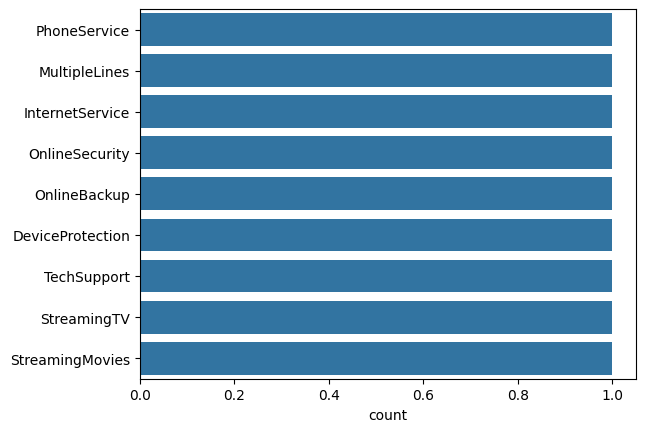

In [59]:
sns.countplot(data = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies'])